<a href="https://colab.research.google.com/github/Gingercapo/Diamond_dataset/blob/main/diamond_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [17]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [18]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# convert cut, color, and clarity into ordered categorical types


In [21]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

In [22]:
# descriptive statistics for numeric variables
print(diamonds.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


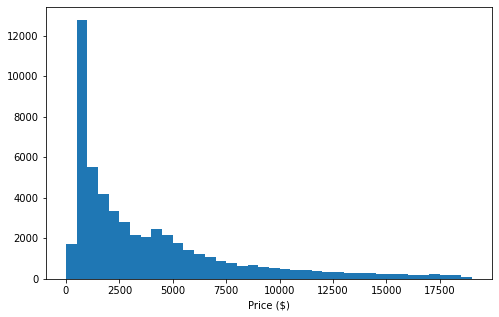

In [23]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, diamonds['price'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'price', bins = bins)
plt.xlabel('Price ($)')
plt.show()

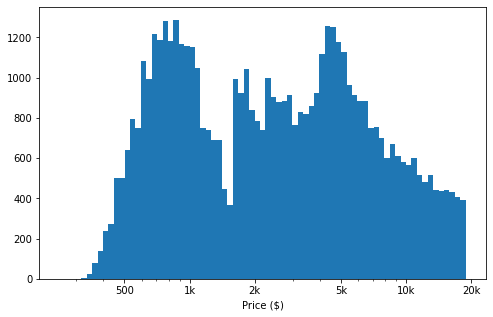

In [24]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(diamonds['price'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'price', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Price ($)')
plt.show()

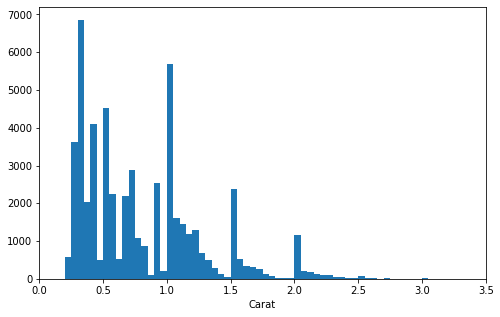

In [26]:

# plotting carat on a standard scale
binsize = 0.05
bins = np.arange(0, diamonds['carat'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'carat', bins = bins)
plt.xlim([0,3.5])
plt.xlabel('Carat')
plt.show()


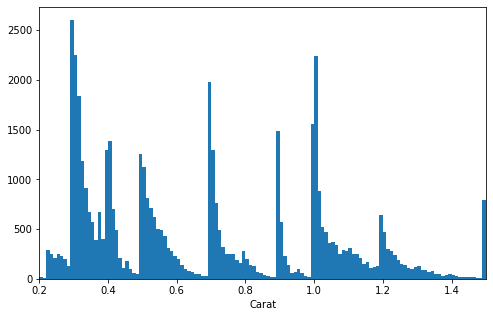

In [27]:
# investigating further on an even smaller bin size
binsize = 0.01
bins = np.arange(0.2, 1.51, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'carat', bins = bins)
plt.xlim([0.2,1.5])
plt.xlabel('Carat')
plt.show()

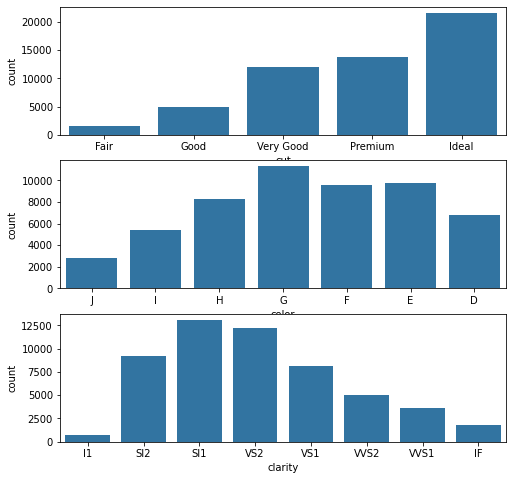

In [28]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = diamonds, x = 'cut', color = default_color, ax = ax[0])
sb.countplot(data = diamonds, x = 'color', color = default_color, ax = ax[1])
sb.countplot(data = diamonds, x = 'clarity', color = default_color, ax = ax[2])

plt.show()

The cut quality of the diamonds in the dataset is generally quite good, with most of them in the Premium or Ideal level. Most of the diamonds are also of color quality G or better. Clarity, shows a trend opposite from the other two features, with most of the diamonds on the lower end of the scale, at VS2 or worse. Clarity grades become rarer as steps are taken up the scale.

I'll now look at the other features in the data to see if any of them hold interesting properties.

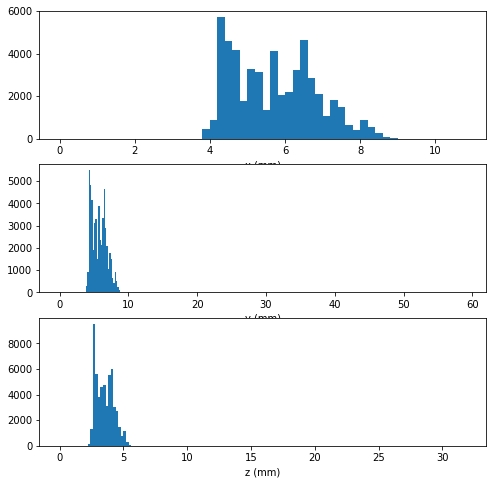

In [29]:
# let's start with the major dimensions of the diamonds, with x, y, and z.

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

variables = ['x', 'y', 'z']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamonds[var]), max(diamonds[var])+0.2, 0.2)
    ax[i].hist(data = diamonds, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

The initial plot of the x, y, and z features show some immediate points of attention. On the y and z plots, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. The left limits of all three plots also suggest that there are some points that take unusually small values. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [30]:
# select low outliers, using criteria eyeballed from the plots

low_outliers = (diamonds['x'] < 3.5) | (diamonds['y'] < 3.5) | (diamonds['z'] < 2)

print(low_outliers.sum())
print(diamonds.loc[low_outliers,:])

23
       carat        cut color clarity  depth  table  price     x     y     z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.00
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.00
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.00
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.00
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.00
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.00
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.00
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.00
14635   1.07      Ideal     F     SI1   60.6   57.0   5909  6.62  6.67  1.07
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.00
20694   1.53      Ideal     I     SI1   61.9   54.0   8971  7.43  7.50  1.53
21654   1.41      Ideal     H     VS1   60.7   56.0   9752  7.31  7.22  1

There are 23 outliers with unusually low values for x, y, or z. Most of them have a 0 value for z, some of them also have a 0 value for x or y. The three diamonds that don't have a 0 value have a z-value that actually matches their carat instead. There might have been an error in data input. Interestingly, these diamonds tend to be fairly high in price, most of them above the median and over half above the third quartile

In [31]:
# select high outliers, using criteria eyeballed from the plots
high_outliers = ((diamonds['y'] > 10) | (diamonds['z'] > 6))
print(high_outliers.sum())
print(diamonds.loc[high_outliers,:])

15
       carat        cut color clarity  depth  table  price      x      y  \
23644   3.65       Fair     H      I1   67.1   53.0  11668   9.53   9.48   
24067   2.00    Premium     H     SI2   58.9   57.0  12210   8.09  58.90   
24328   3.50      Ideal     H      I1   62.8   57.0  12587   9.65   9.59   
25998   4.01    Premium     I      I1   61.0   61.0  15223  10.14  10.10   
25999   4.01    Premium     J      I1   62.5   62.0  15223  10.02   9.94   
26194   2.01       Fair     G     SI2   65.6   56.0  15562   7.89   7.84   
26431   3.40       Fair     D      I1   66.8   52.0  15964   9.42   9.34   
26444   4.00  Very Good     I      I1   63.3   58.0  15984  10.01   9.94   
26534   3.67    Premium     I      I1   62.4   56.0  16193   9.86   9.81   
27130   4.13       Fair     H      I1   64.8   61.0  17329  10.00   9.85   
27415   5.01       Fair     J      I1   65.5   59.0  18018  10.74  10.54   
27630   4.50       Fair     J      I1   65.8   58.0  18531  10.23  10.16   
27679   3

Most of the high outliers appear to be valid points, with the exception of the three points with extreme values in the y and z variables. As a final outlier check, since 'table' is the ratio of z to the average of x and y ((2*z)/(x+y)), we can see how many points do not have a matching calculated value.

In [32]:
# select points whose depth value does not match x, y, and z values.
incorrect_depth = (np.abs(2 * diamonds['z'] / (diamonds['x'] + diamonds['y']) - diamonds['depth']/100) > 0.1)
no_size_info = ((diamonds['x'] == 0) & (diamonds['y'] == 0))
print(diamonds.loc[incorrect_depth | no_size_info,['carat','depth','x','y','z']])

       carat  depth     x      y      z
2207    1.00   59.1  6.55   6.48   0.00
2314    1.01   58.1  6.66   6.60   0.00
2941    1.00   62.8  6.26   6.19   3.19
4518    1.00   43.0  6.32   6.27   3.97
4791    1.10   63.0  6.50   6.47   0.00
5471    1.01   59.2  6.50   6.47   0.00
6341    1.00   44.0  6.31   6.24   4.12
10167   1.50   64.0  7.15   7.04   0.00
10377   1.09   43.0  6.53   6.55   4.12
11182   1.07   61.6  0.00   6.62   0.00
11963   1.00   63.3  0.00   0.00   0.00
13601   1.15   59.2  6.88   6.83   0.00
14635   1.07   60.6  6.62   6.67   1.07
15951   1.14   57.5  0.00   0.00   0.00
19502   1.57   67.3  7.85   5.75   3.87
20694   1.53   61.9  7.43   7.50   1.53
21654   1.41   60.7  7.31   7.22   1.41
24067   2.00   58.9  8.09  58.90   8.06
24394   2.18   59.4  8.49   8.45   0.00
24520   1.56   62.2  0.00   0.00   0.00
25849   2.00   59.0  6.16   6.15   4.82
26123   2.25   61.3  8.52   8.42   0.00
26194   2.01   65.6  7.89   7.84   6.16
26243   1.20   62.1  0.00   0.00   0.00


This check captures not only the 26 outliers that were identified above, but a number of other points that had conflicting information. For safety, I'll remove all of these inconsistent points from the data. Then, I'll recreate the plots of x, y, and z.

In [33]:
# remove points with inconsistent depth values.
diamonds = diamonds.loc[-incorrect_depth & -no_size_info,:]

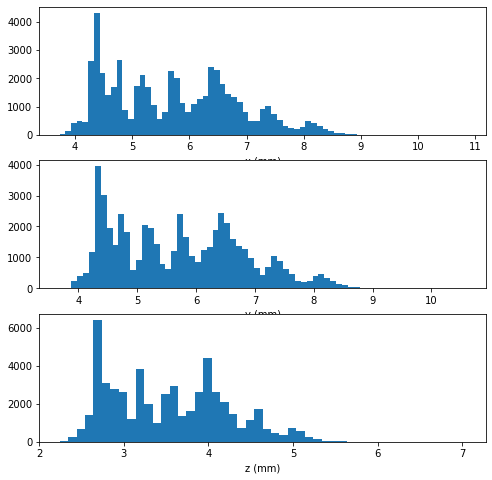

In [34]:
# re-plot the distribution of x, y, and z.
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

variables = ['x', 'y', 'z']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamonds[var]), max(diamonds[var])+0.1, 0.1)
    ax[i].hist(data = diamonds, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

Interestingly, the shape of the x, y, and z distributions are very similar to one another. The z distribution just looks slightly different since it takes a smaller range of values, and so the bins are larger in a relative sense. It's likely that these variables will be highly correlated with one another, and probably have a strong correlation with carat.

Before closing this section, we'll take a look at the last two variables: depth and table.

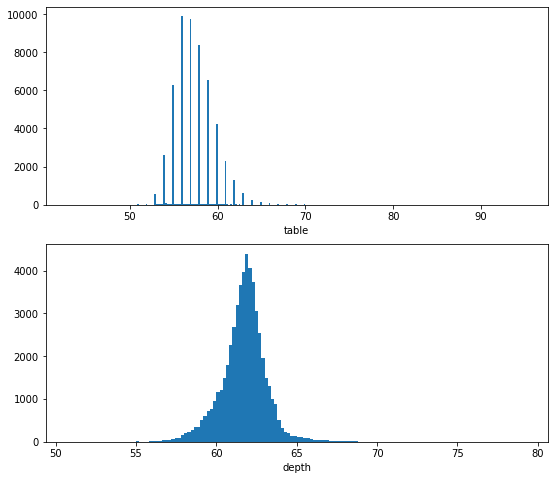

In [35]:
# re-using code to plot depth and table.
fig, ax = plt.subplots(nrows=2, figsize = [9,8])

variables = ['table', 'depth']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamonds[var]), max(diamonds[var])+0.2, 0.2)
    ax[i].hist(data = diamonds, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()

Both table and depth are unimodal, but the distributions are slightly skewed and look a little narrower than a normal distribution. Table is slightly skewed right, while depth is slightly skewed left; I wonder if they're negatively correlated. Table is also a discrete numeric variable.

Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The price variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between  500𝑎𝑛𝑑 1000, and another just below $5000.

Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
When investigating the x, y, and z size variables, a number of outlier points were identified. Overall, these points can be characterized by an inconsistency between the recorded value of depth, and the value that would be derived from using x, y, and z. For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.bold text

In [36]:
numeric_vars = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categoric_vars = ['cut', 'color', 'clarity']

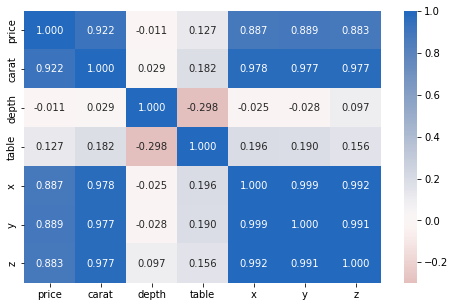

In [37]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(diamonds[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

diamonds.shape= (53901, 10)
diamonds_samp.shape= (500, 10)


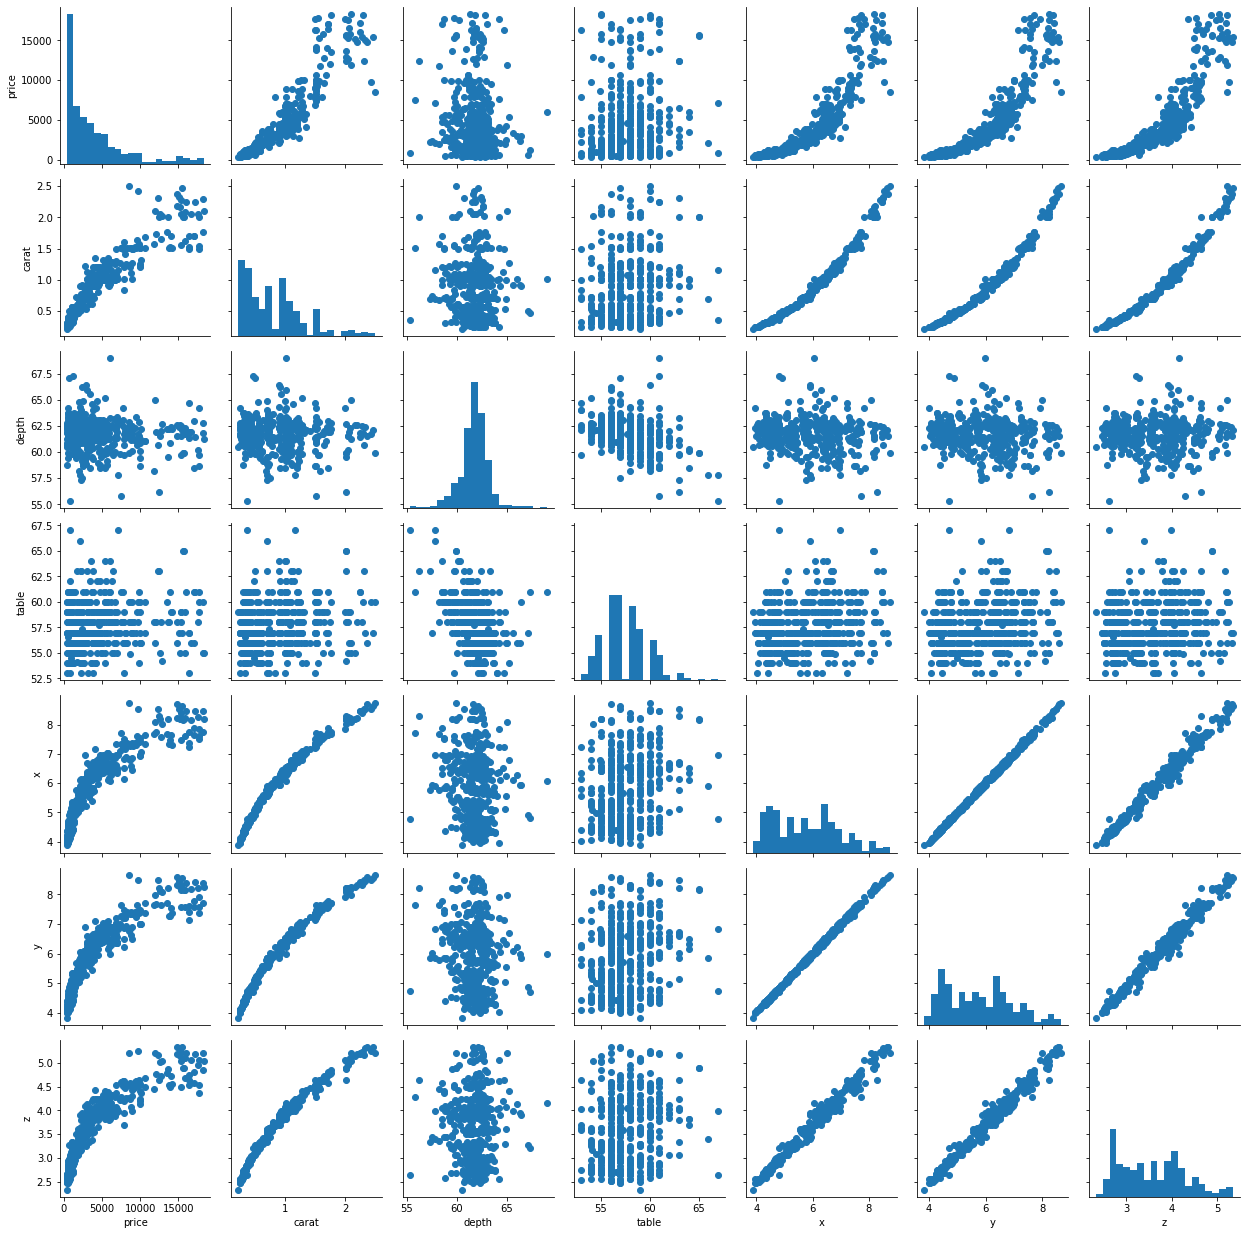

In [38]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("diamonds.shape=",diamonds.shape)
diamonds_samp = diamonds.sample(n=500, replace = False)
print("diamonds_samp.shape=",diamonds_samp.shape)

g = sb.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, the 'x', 'y', and 'z' dimensions are all highly correlated with one another, and all of them are also highly correlated with carat. Since carat is a measure of diamond size, it's not too surprising that the overall trend between carat and the three individual dimensions appears polynomial. In addition, since all the diamonds are round-cut, it makes sense that the 'x', 'y', and 'z' sizes would all move proportionally together.

Surprisingly, the correlation coefficient between price and carat is very high, despite the fact that price has such a large range of values. This will be worth extra exploration in this section. Depth and table don't have strong correlations with any other numeric variables in the dataset, and we see the moderate negative correlation hypothesized in the previous section. I won't perform any further analyses with these variables since they don't look like they'll be of much further interest.

Let's move on to looking at how price and carat weight correlate with the categorical variables.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

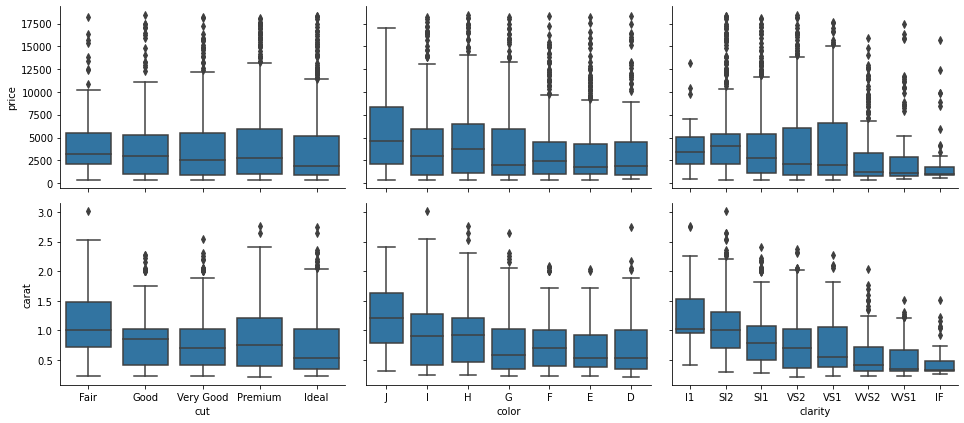

In [39]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

# Deprecated
# samples = np.random.choice(diamonds.shape[0], 2000, replace = False)
# diamonds_samp = diamonds.loc[samples,:]

diamonds_samp = diamonds.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = ['price', 'carat'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

In [19]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

In [20]:
# univariate plot of diamond prices
# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.distplot(data=diamonds, x='price');

TypeError: ignored

> Throughout this case study, you'll see comments in Markdown cells like the one below, where the text has been colored in white. Unlike the exercises in earlier lessons, a reference plot will not be provided: you'll need to assess on your own whether or not your plot matches the comments. To view these comments, you can either highlight the text, or double click the Markdown cell. Remove or change the 'color=white' style on the text to un-spoiler the commentary.

Price distribution comment 1: <span style="color:white">You should create a histogram for price, since it is a numeric variable. Your initial plots should show that diamond price follows a highly skewed distribution. If you haven't tried a log scaling, then try that now.</span>

Price distribution comment 2: <span style="color:white">Under a log scale, you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.</span>

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

In [ ]:
# univariate plot of carat weights


Carat distribution comment: <span style="color:white">You should see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?</span>

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

In [ ]:
# univariate plots of cut, color, and clarity grades


General categorical feature comment: <span style="color:white">Since these features are categorical, you should be producing bar charts here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level. Check the previous page if you need documentation on how the scales are set up, since they're not completely intuitive!</span>

Cut distribution comment: <span style="color:white">The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.</span>

Color distribution comment: <span style="color:white">The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)</span>

Clarity distribution comment: <span style="color:white">There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).</span>

#bivariate

In [ ]:
# bivariate plot of price vs. carat
sample = np.random.choice(diamonds.shape[0], 600, replace = False)
diamonds_subset = diamonds.loc[sample]
sb.regplot(data = diamonds_subset, x = 'price', y = 'carat');

In [ ]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [ ]:
# multivariate plot of price by carat weight, and clarity
for col in ['cut', 'color', 'clarity']:
    fig, ax =plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(col, fontsize=18)
    diamonds[col].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%")
    ax[0].legend()
    for val in diamonds[col].unique():
        sb.distplot(diamonds[diamonds[col] == val]['price'], ax=ax[1], label=val, kde=False)
    ax[1].legend()
    plt.show()

In [ ]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = diamonds, x = 'color', y = 'price', hue = 'cut')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)

plt.show();